In [1]:
# imports some tools you will use

# numpy the matrix multiplication and basic mathematics package
import numpy as np

# matplotlib - this is the most common plotting library 
import matplotlib.pyplot as plt

data = np.load("data.npy", allow_pickle=True).item() #,mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='bytes')


\begin{equation}
C = \varepsilon \cdot \frac{A}{l} 
\label{eq:eq1}
\end{equation}


where $A$ is the area of the plates and $l$ is the length  or the distance between the parallel plates. When the parallel plates are cylindrical area $A$, equation becomes 

\begin{equation}
C = \varepsilon \cdot \frac{\pi \cdot r^2}{l}
\label{eq:eq2}
\end{equation}

$r$, radius of the cylindarical plate, is given as 50 μm and $l$, the length or thickness of the cylindarical plate, is given as 20 nm. Capacitance values are recorded in data file. To find the Dielectric Permittivity, $\varepsilon$, equation becomes:

\begin{equation}
\varepsilon = {C} \cdot \frac{l}{\pi \cdot r^2}
\label{eq:eq3}
\end{equation}

Additionally, Permittivity, $\varepsilon$ is the ratio between $\varepsilon_{0}$, permittivity of vacuum, and $\varepsilon_{r}$, relative permittivity, given as following

\begin{equation}
\varepsilon = \varepsilon_{0} \times \varepsilon_{r}
\label{eq:eq4}
\end{equation}

At last, dielectric constant or relative permittivity, $\varepsilon_{r}$ is found as following

\begin{equation}
\varepsilon_{r} = \frac{C}{\varepsilon_{0}}  \frac{l}{\pi \cdot r^2}
\label{eq:eq5}
\end{equation}

In [2]:
constant = np.pi*50*(10**(-6))*50*(10**(-6))/(200*(10**(-9))) #i removed the 10^-12 term just because permittivity values cant be that high. 
#Additionally Capacitance values might be in pF rather F values.

In [3]:
#ds = data["sample_1"]
ls = (data["sample_1"]/constant)
ls.shape

(50, 100)

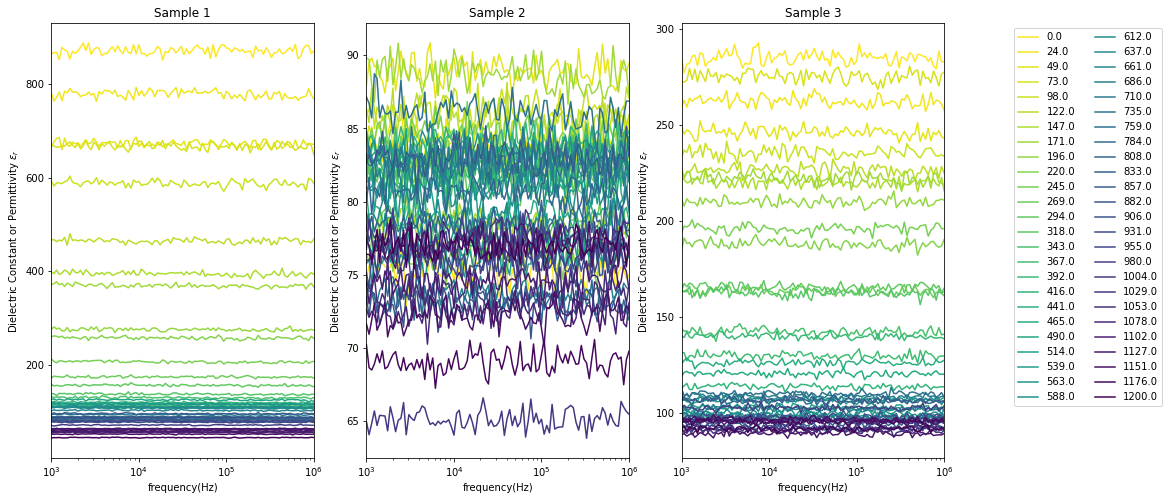

In [4]:
fig1 = fig, axs = plt.subplots(1, 3, figsize=(16,8)) #Creating three subplots with given sizes

color = np.flipud(plt.cm.viridis(np.linspace(0,1,50))) #color change function for each plot in same subplot since we have 50 different voltages applied to the material.
#linspaced function create an array with 50 number and viridis function holds. Flipping function might be necessary due to plotting follows column like pattern(?)

# Add your code for your loop here. 
i=0
j=0
while i<50:
    axs[0].semilogx(data["ac_frequency"], data["sample_1"][i]/constant ,color=color[i])
    axs[1].semilogx(data["ac_frequency"], data["sample_2"][i]/constant ,color=color[i])
    axs[2].semilogx(data["ac_frequency"], data["sample_3"][i]/constant ,color=color[i])
    i+=1

while j<3:
    axs[j].set_xlim(1000, 1000000)
    axs[j].set_title(f"Sample {j+1}")
    axs[j].set_xlabel('frequency(Hz)')
    axs[j].set_ylabel('Dielectric Constant or Permittivity $\epsilon_{r}$')
    j+=1

chartBox = axs[2].get_position()

rv = np.rint(data["dc_voltage_vector"]) #rounded voltage values
axs[2].set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height]) #only first subplot area is given and same values are assigned for each element
axs[2].legend(rv ,loc='upper right', bbox_to_anchor=(1.85, 1), ncol=2)

#insert legend fuction here to show which of these colors indicates lower voltage or higher voltage in color gradient

In [5]:
#this equation is based on Rayleigh law. 
fr1 = np.empty((0,2), float) #fitresults1 for sample 1 
fr2 = np.empty((0,2), float) #fitresults2 for sample 2
fr3 = np.empty((0,2), float) #fitresults3 for sample 3 
i=0
while i<50: #i started to become more efficient since i managed to create more compact code.
    fr1 = np.append(fr1, [np.polyfit(data["ac_frequency"], data["sample_1"][i]/constant,1)], axis=0)
    fr2 = np.append(fr2, [np.polyfit(data["ac_frequency"], data["sample_2"][i]/constant,1)], axis=0)
    fr3 = np.append(fr3, [np.polyfit(data["ac_frequency"], data["sample_3"][i]/constant,1)], axis=0)
    i+=1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


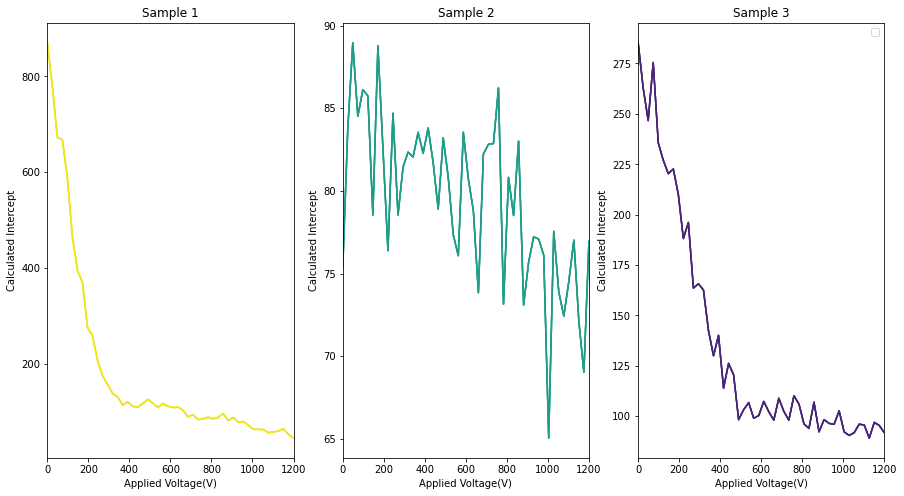

In [6]:
import matplotlib.pyplot as plt
i=0

fig2 = fig, axs = plt.subplots(1, 3, figsize=(15,8))

while i<3:
    axs[0].plot(data['dc_voltage_vector'], fr1.T[1], color=color[1])
    axs[1].plot(data['dc_voltage_vector'], fr2.T[1] , color=color[22])
    axs[2].plot(data['dc_voltage_vector'], fr3.T[1], color=color[44])
    axs[i].set_title(f"Sample {i+1}")
    axs[i].set_xlabel('Applied Voltage(V)')
    axs[i].set_ylabel('Calculated Intercept')
    axs[i].set_xlim(0,1200)
    i+=1

chartBox = axs[2].get_position()
axs[2].set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height]) #only first subplot area is given and same values are assigned for each element
axs[2].legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1)

In [17]:
iceptarr = np.array([fr1,fr2,fr3]) # a new array is created to use in loops.
new_fit1 = np.empty((0,2), float) #array for the first linear region of the samples
new_fit2 = np.empty((0,2), float) #array for the second linear region of the samples
idx = (data['dc_voltage_vector']>=0)*(data['dc_voltage_vector']<400) 
i=0
while idx[i] == True: #since idx function give us the boolean output and it is true up to the voltage value that we set. 
#Until that point i is going to increase at it will be the last x point for the first linear region
    i+=1

j=0
while j<3:
    new_fit1 = np.append(new_fit1, [np.polyfit(data["dc_voltage_vector"][:i], iceptarr[j].T[1][:i],1)], axis=0) #extrinsic region tangent line
    new_fit2 = np.append(new_fit2, [np.polyfit(data["dc_voltage_vector"][i:], iceptarr[j].T[1][i:],1)], axis=0) #intrinsic region tangent line
    j+=1

<Figure size 1280x800 with 0 Axes>

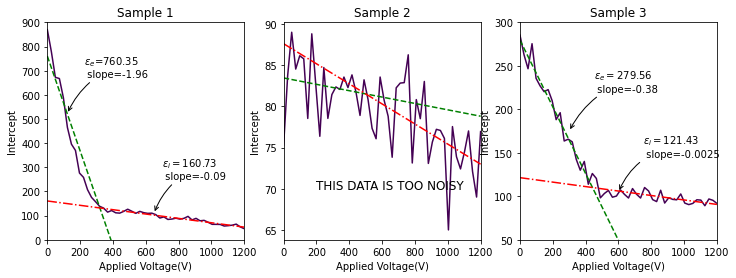

In [18]:
dvc =  np.linspace(0,data["dc_voltage_vector"][49],100) #just creating x points to sketch fitting lines
plt.figure(figsize=(8, 5), dpi=160)
fig, axs = plt.subplots(1, 3, figsize=(12,4))

k=0
while k < 3: # a loop calling intercept and slope values to sketch tangent lines. 
    axs[k].plot(data['dc_voltage_vector'], iceptarr[k].T[1] , color=color[49]) 
    axs[k].plot(dvc,new_fit1[k][1]+new_fit1[k][0]*dvc, "g--") 
    axs[k].plot(dvc,new_fit2[k][1]+new_fit2[k][0]*dvc, "r-.")
    axs[k].set_xlim(0, 1200)
    axs[k].set_title(f"Sample {k+1}") #labeling operation
    axs[k].set_xlabel('Applied Voltage(V)')
    axs[k].set_ylabel("Intercept")
    k+=1

axs[0].set_ylim(0, 900)
axs[2].set_ylim(50 ,300)

#figure 1 annotates
axs[0].annotate('$\epsilon_{e}$=760.35\n slope=-1.96',xy=(dvc[10], new_fit1[0][1]+new_fit1[0][0]*dvc[10]),  xycoords='data',
            xytext=(dvc[10]+100, new_fit1[0][1]+new_fit1[0][0]*dvc[10]+150), textcoords='data', fontsize=10,
           arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
            ) #extrinsic region
axs[0].annotate('$\epsilon_{i}=160.73$\n slope=-0.09', xy=(650, 110),  xycoords='data',
            xytext=(700, 250), textcoords='data', fontsize=10,
           arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
            ) #intrinsic region
axs[1].annotate('THIS DATA IS TOO NOISY',xy=(200, 65),  xycoords='data',
            xytext=(200,70), textcoords='data', fontsize=12)
          
#figure 3 annotates
axs[2].annotate('$\epsilon_{e}=279.56$\n slope=-0.38', xy=(300, 175),  xycoords='data',
            xytext=(450, 220), textcoords='data', fontsize=10,
           arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
            ) #extrinsic region
axs[2].annotate('$\epsilon_{i}= 121.43$\n slope=-0.0025', xy=(600, 105),  xycoords='data',
            xytext=(750, 145), textcoords='data', fontsize=10,
           arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.3"),
            ) #intrinsic region
plt.savefig('qnaber.pdf', bbox_inches='tight', transparent = 'False', dpi=800)